# Segmentación de imagen utilizando filtros

## Importar librerías.

In [1]:
import matplotlib.pyplot as plt

from skimage.io import imread

# Convertir imagen en escala de grises
from skimage.color import rgb2gray

In [2]:
# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle

In [3]:
# Se define función que permita mostrar las imagenes sin los números en los ejes
def imshow(img):
    fig, ax = plt.subplots(figsize=(10, 10))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

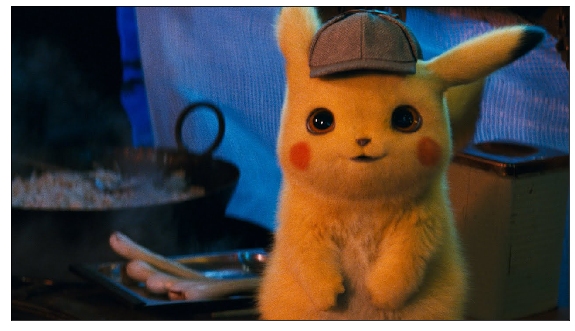

In [4]:
ruta_imagen = 'img/detective-pikachu.jpg'
imagen = imread(ruta_imagen)
imshow(imagen)

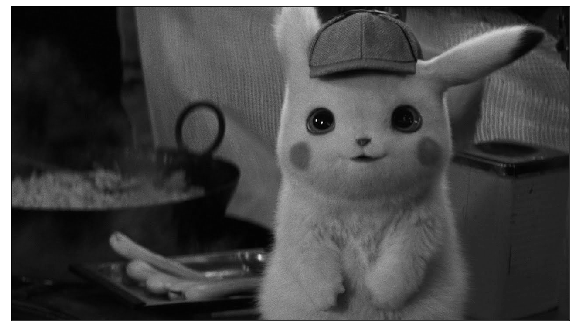

In [5]:
# Pasar imagen a escala de grises
imagen = rgb2gray(imagen)
imshow(imagen)

## Filtro paso bajo

Permite difuminar ruido. Utilizando media o mediana difumina el detalle de la imagen.

In [6]:
from skimage.filters import median, gaussian

### Mediana

El filtro de paso bajo Mediana permite eliminar el ruido y difuminar el detalle de una imagen a través de sustituir el valor con frecuencia alta con el valor del medio de un conjunto de datos.

Por ejemplo:

X = [10 9 11 15 98 14 13]

La mediana sería 15 y se sustituiría el valor 98 con el de la mediana.

El conjunto de datos debe ser un número discreto.

Si el conjunto de datos es un número par entonces se utiliza el promedio de los dos vecinos del medio del conjunto.

C:\Users\Francisco\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


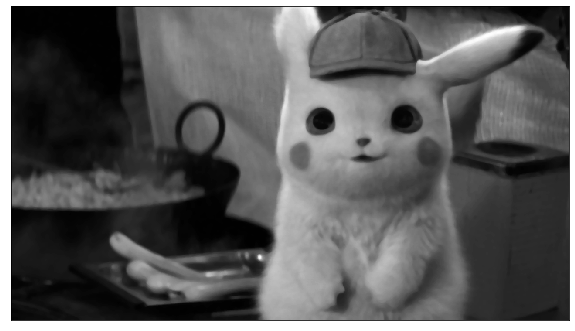

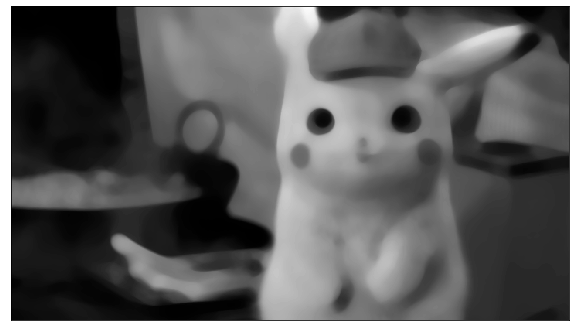

In [7]:
imagen_mediana = median(imagen, disk(5))
imshow(imagen_mediana)

imagen_mediana = median(imagen, disk(20))
imshow(imagen_mediana)

Se aprecia que luego de aplicar un mayor radio al disco del filtro mediana desaparecen los detales de la pupila, el pelaje, boca y fondo de la imagen.

### Gaussiano

El filtro Gaussiano (filtro de Gauss) utiliza la ecuación de Gaus para generar el suavizado de la imagen, donde el valor de cada pixel es el resultado de promediar con distintos pesos los valores vecinos a ambos lados de dicho punto.

Para esto se utiliza un valor sigma:

A un menor valor de sigma se aprecia menor suavizado de la imagen. Ocasionado por los puntos cercanos al pixel evaluado.

A un mayor valor de sigma se aprecia mayor suavizado de la imagen, llegando a nublar la imagen. Ocasionado por los puntos más alejados del pixel evaluado.

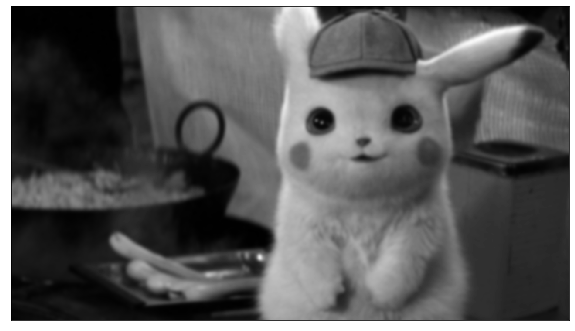

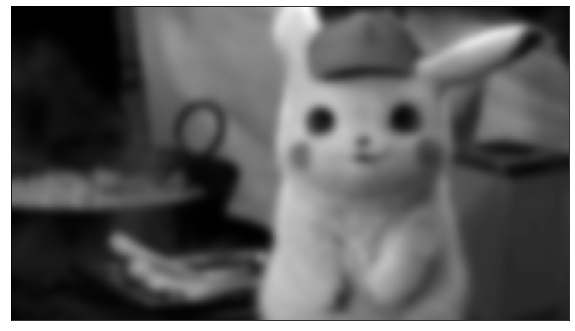

In [8]:
imagen_gaussian = gaussian(imagen, sigma=3)
imshow(imagen_gaussian)

imagen_gaussian = gaussian(imagen, sigma=10)
imshow(imagen_gaussian)

Se aprecia que luego de aplicar un mayor radio al disco del filtro gausiano desaparecen los detales de la pupila, el pelaje, boca y fondo de la imagen.

## Filtro paso alto

Permite realzar las diferencias en la imagen.

Segmenta la imagen realzando los contrastes de los bordes.

In [9]:
# Operadores espaciales
from skimage.filters import prewitt, sobel, roberts
from skimage.feature import canny

### Prewitt

El operador Prewitt detecta bordes de imagenes utilizando el vector [ 1 0 -1 ] para los gradientes del eje X e Y que son multiplicados por cada pixel.

Kernel para Gradiente X:

[[1 0 -1], [1 0 -1], [1 0 -1]]

Kernel para Gradiente Y:

[[1 1 1], [0 0 0], [-1 -1 -1]]

Se eleva al cuadrado cada resultado de los gradientes para luego sumarse y obtener su raíz cuadrada.

math.sqrt(gradiente_x ** 2 + gradiente_y ** 2)

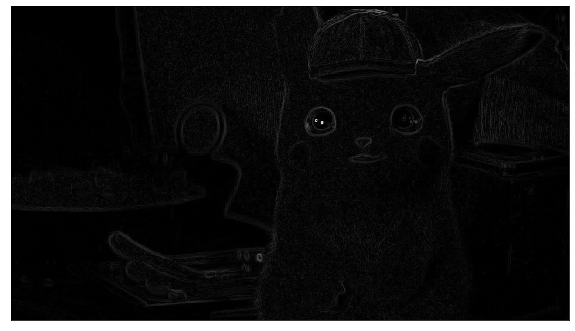

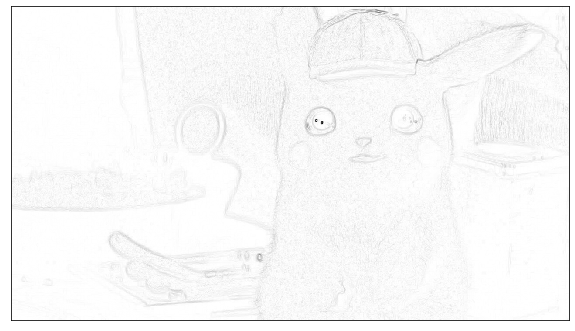

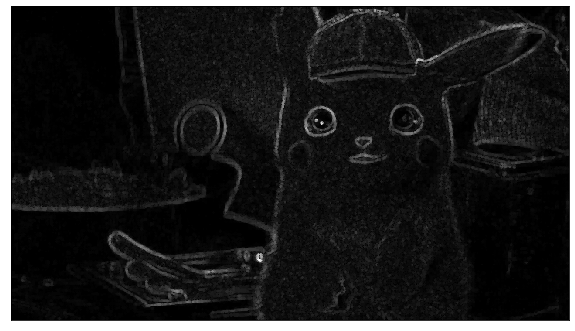

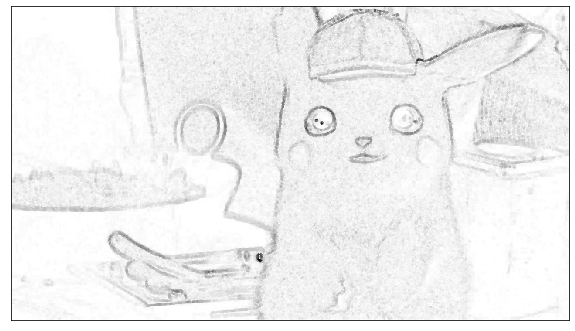

In [10]:
imagen_bordes_prewitt = prewitt(imagen)
imshow(imagen_bordes_prewitt)

# Se aplica el negativo a la imagen para poder visualizar mejor los bordes
imshow(1 - imagen_bordes_prewitt)

imagen_bordes_prewitt_1 = opening(imagen_bordes_prewitt, disk(2))
imshow(imagen_bordes_prewitt_1)

# Se aplica el negativo a la imagen para poder visualizar mejor los bordes
imshow(1 - imagen_bordes_prewitt_1)

### Prewitt a imagen con paso bajo Media

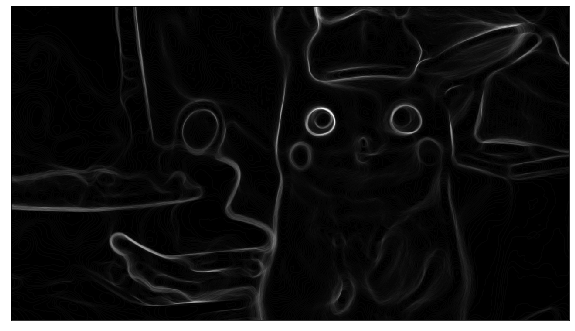

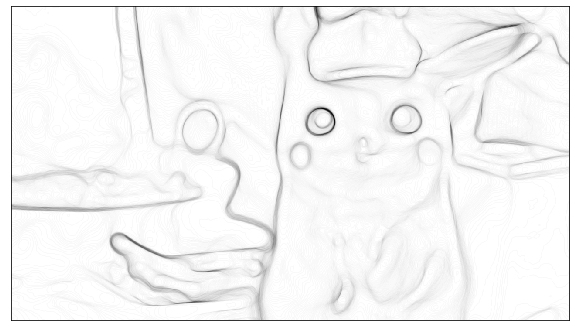

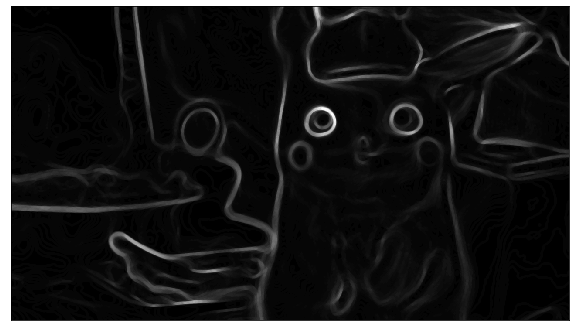

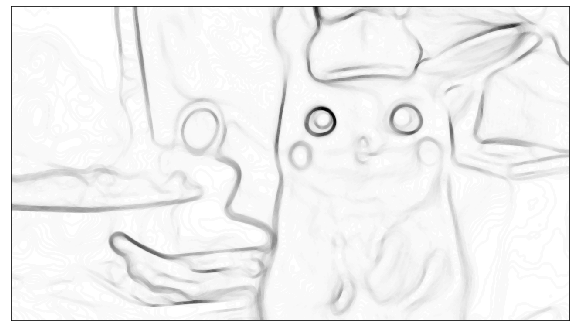

In [11]:
imshow(prewitt(imagen_mediana))

# Se aplica el negativo a la imagen para poder visualizar mejor los bordes
imshow(1 - prewitt(imagen_mediana))

imshow(dilation(prewitt(imagen_mediana), disk(2)))

# Se aplica el negativo a la imagen para poder visualizar mejor los bordes
imshow(1 - dilation(prewitt(imagen_mediana), disk(2)))

### Sobel

El operador Sobel detecta bordes de imagenes utilizando una matriz llamada Kernel para cada uno de los gradientes (eje X e Y) y son multiplicados por cada pixel.

Kernel para Gradiente X:

[[1 0 -1], [2 0 -2], [1 0 -1]]

Kernel para Gradiente Y:

[[1 2 1], [0 0 0], [-1 -2 -1]]

Se eleva al cuadrado cada resultado de los gradientes para luego sumarse y obtener su raíz cuadrada.

math.sqrt(gradiente_x ** 2 + gradiente_y ** 2)

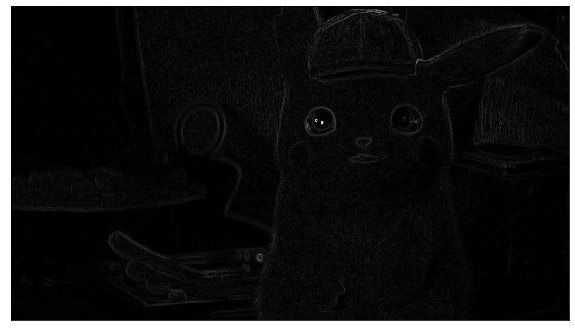

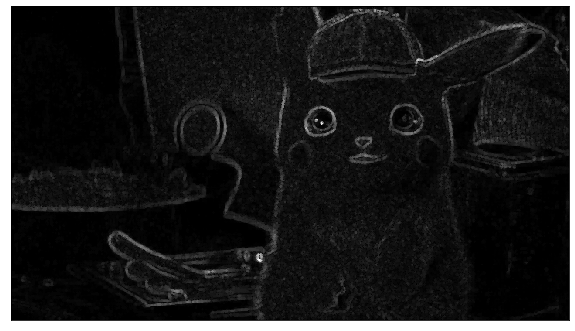

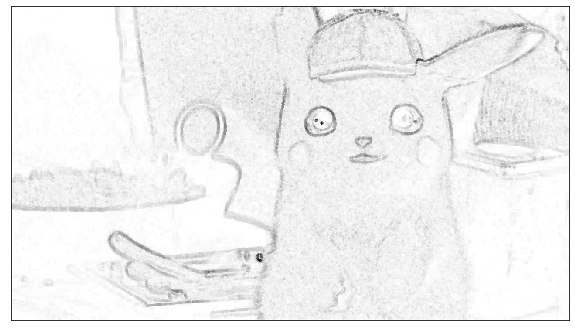

In [12]:
imagen_bordes_sobel = sobel(imagen)
imshow(imagen_bordes_sobel)

imagen_bordes_sobel_1 = opening(imagen_bordes_sobel, disk(2))
imshow(imagen_bordes_sobel_1)

# Se aplica el negativo a la imagen para poder visualizar mejor los bordes
imshow(1 - imagen_bordes_sobel_1)

### Roberts

El operador Roberts detecta bordes de imagenes utilizando una matriz de dimensión 2x2 al cual se llama Kernel para cada uno de los gradientes (eje X e Y) y son multiplicados por cada pixel.

Kernel para Gradiente X:

[[1 0], [0 -1]]

Kernel para Gradiente Y:

[[0 1], [-1 0]]

Se eleva al cuadrado cada resultado de los gradientes para luego sumarse y obtener su raíz cuadrada.

math.sqrt(gradiente_x ** 2 + gradiente_y ** 2)

Otra aplicación podría ser utilizano el valor absoluto de los gradientes.

math.abs(gradiente_x) + math.abs(gradiente_y)

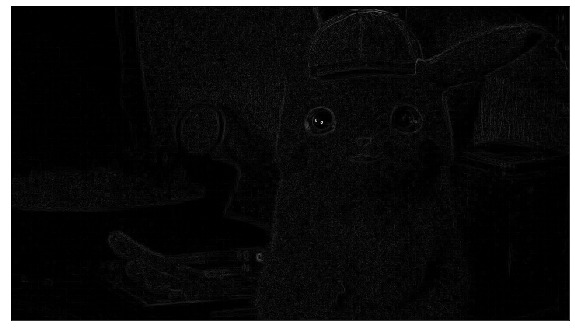

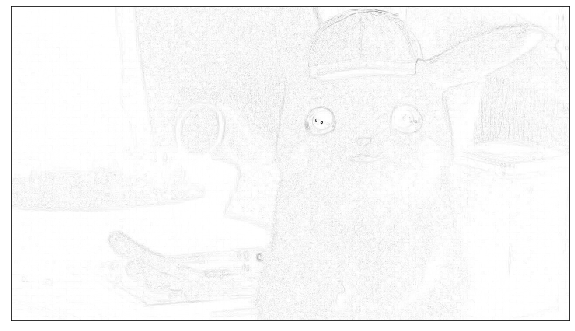

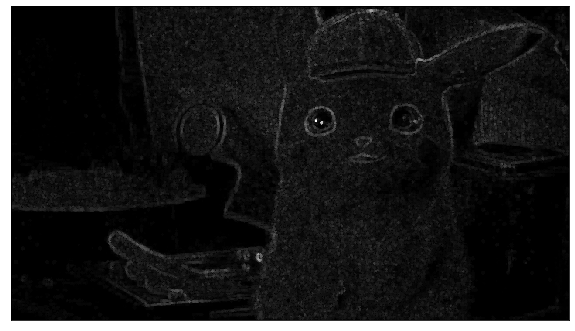

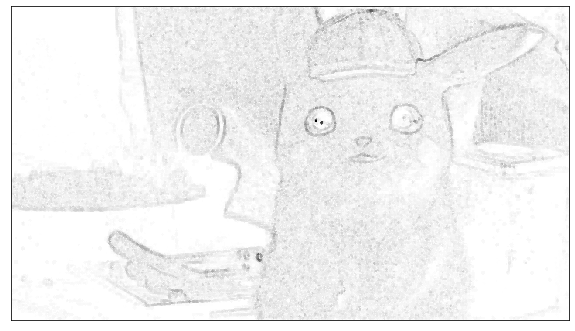

In [13]:
imagen_bordes_roberts = roberts(imagen)
imshow(imagen_bordes_roberts)

# Se aplica el negativo a la imagen para poder visualizar mejor los bordes
imshow(1 - imagen_bordes_roberts)

imagen_bordes_roberts_1 = opening(imagen_bordes_roberts, disk(2))
imshow(imagen_bordes_roberts_1)

# Se aplica el negativo a la imagen para poder visualizar mejor los bordes
imshow(1 - imagen_bordes_roberts_1)

### Canny

El operador Canny es un operador de múltiples etapas para detectar bordes en una imagen. Evita crear falsos bordes ocasionados por el ruido de la imagen.

Para esto se utiliza un valor sigma que permita definir una desviación estándar gausiana, permitiendo definir una escala para los bordes de la imagen. Debe ser un número mayor a cero y entre 0 y 2.

A un menor valor de sigma se aprecia mayor número de bordes.

A un mayor valor de sigma se aprecia menor número de bordes.

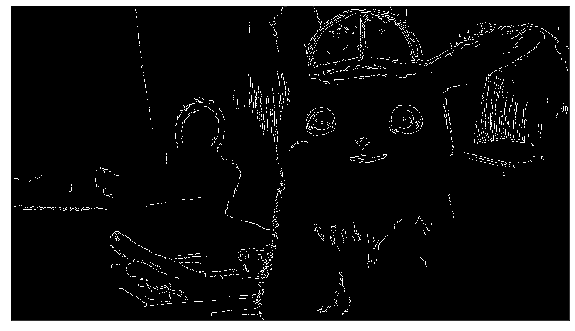

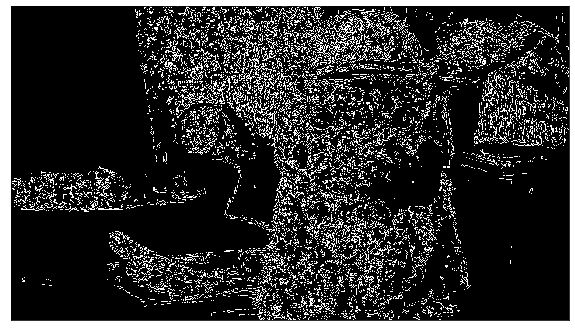

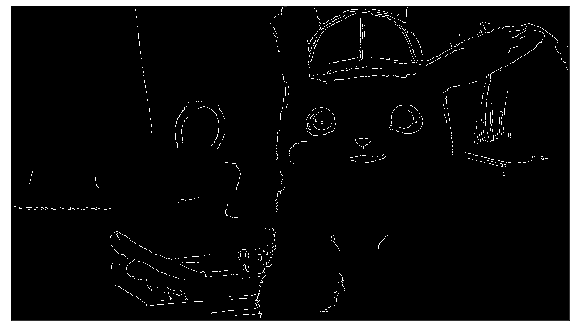

In [14]:
imagen_bordes_canny = canny(imagen)
imshow(imagen_bordes_canny)

imagen_bordes_canny = canny(imagen, sigma=0.1)
imshow(imagen_bordes_canny)

imagen_bordes_canny = canny(imagen, sigma=1.5)
imshow(imagen_bordes_canny)